In [136]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [137]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [138]:
df = pd.read_csv("C:\\AIdata\\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [139]:
# 컬렴명 확인
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Text(0.5, 1.0, 'Label')

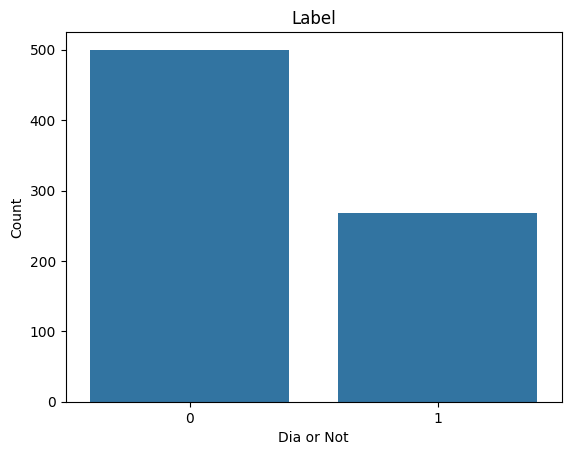

In [140]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Outcome")
plt.xlabel("Dia or Not")
plt.ylabel("Count")
plt.title("Label")

In [141]:
# 레이블 갯수 확인 (숫자)
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [142]:
# 결측치 확인
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [143]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [144]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


C:\Users\kgg07\AppData\Local\Temp\ipykernel_16516\633891066.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BMI'], kde = True, hist = False, ax=ax1)
C:\Users\kgg07\AppData\Local\Temp\ipykernel_16516\633891066.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], ax=ax2)

<Axes: xlabel='Age', ylabel='Density'>

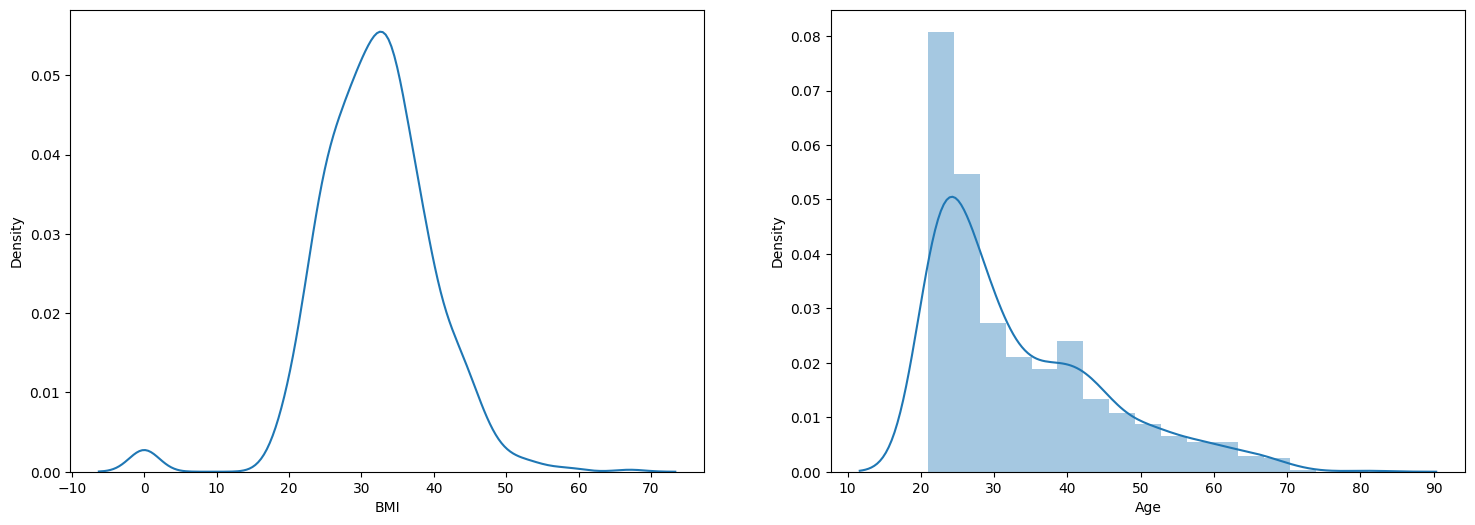

In [145]:
# 컬럼별 히스토그램 확인

figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(df['BMI'], kde = True, hist = False, ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.distplot(df['Age'], ax=ax2)

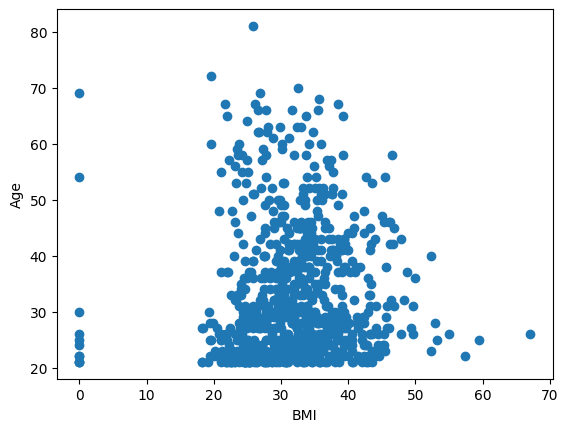

In [146]:
# 산점도 확인

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['BMI'], df['Age'])
plt.xlabel('BMI')
plt.ylabel('Age')

plt.show()

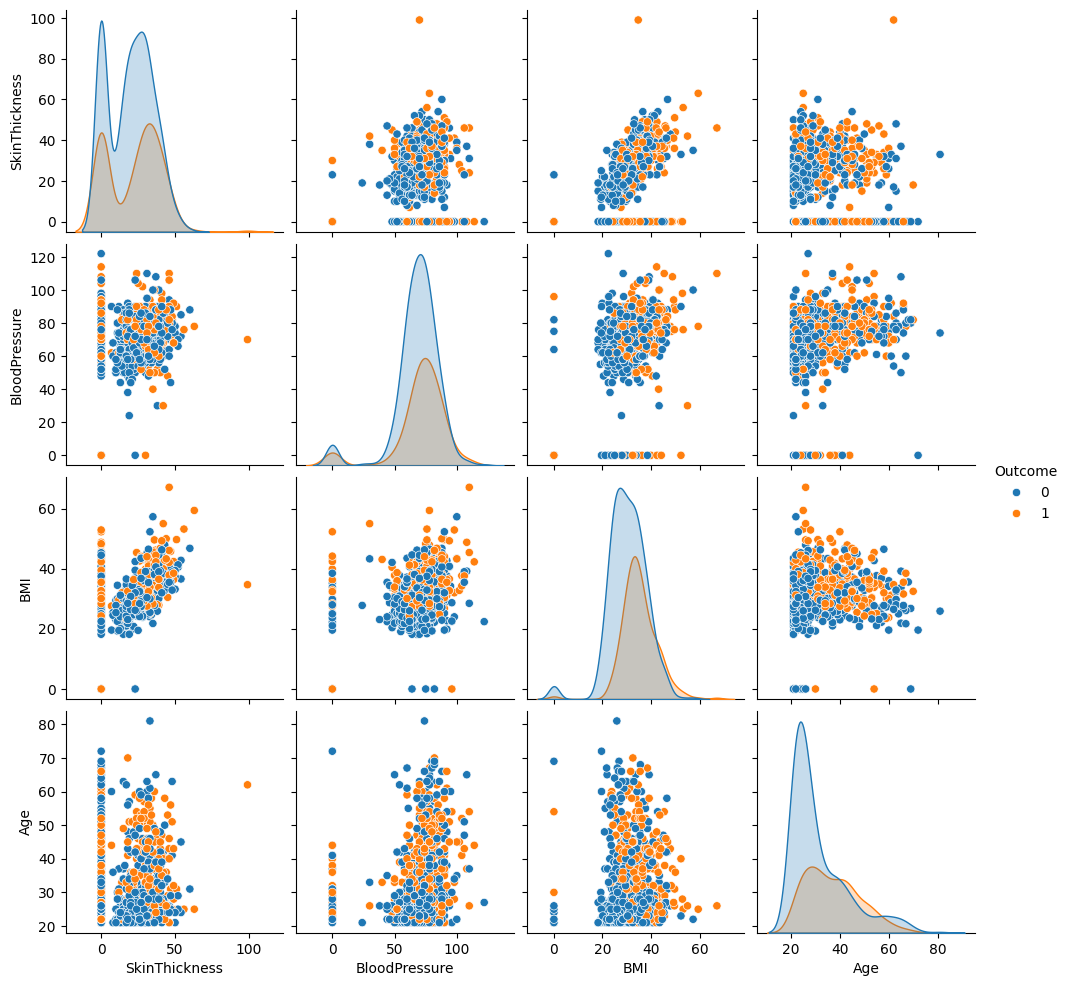

In [147]:
# pairplot를 사용해 각 상관관계 살펴보기

sns.pairplot(df,
             vars=['SkinThickness', 'BloodPressure', 'BMI', 'Age'],
            hue ='Outcome')
plt.show()

In [148]:
X=df.drop('Outcome',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [149]:
y=df['Outcome']
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [150]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# **원 - 핫 ** 인코딩

In [151]:
Y = pd.get_dummies(y).values

# 딥러닝 입력을 위해 Numpy로 변환

In [152]:
X = X.values

In [153]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [154]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [155]:
Y

# 일반적으로 원-핫 인코딩은 0과 1의 숫자 값을 사용하지만, 
# 특정 상황이나 설정에 따라 불리언 값(True/False)으로 표현될 수 있음.

array([[False,  True],
       [ True, False],
       [False,  True],
       ...,
       [ True, False],
       [False,  True],
       [ True, False]])

In [156]:
from sklearn.model_selection import train_test_split # model_selection 모듈에서 가져오기
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

#X: 입력 변수(특징)를 포함하는 데이터셋입니다. 보통 독립 변수들이 들어갑니다.
#Y: 타겟 변수(라벨)를 포함하는 데이터셋입니다. 보통 종속 변수들이 들어갑니다.
#test_size=0.2: 전체 데이터의 20%를 테스트 세트로 사용하고, 나머지 80%를 훈련 세트로 사용합니다.
#random_state=0: 난수 생성기를 초기화하여 결과를 재현 가능하게 만듭니다. 동일한 random_state 값을 사용하면 매번 같은 방식으로 데이터를 분할할 수 있습니다.

In [157]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense #dense layer
from keras.optimizers import SGD,Adam #경사 하강법, 학습 속도를 조절

In [158]:
model = Sequential() #모델 유형 중 하나, 층을 순차적으로 쌓아서 네트워크를 구성

In [159]:
model.add(Dense(64,input_shape=(8,),activation='tanh')) # 10 노드, 입력 데이터의 형태, 활성화 함수
model.add(Dense(32,activation='tanh'))
model.add(Dense(16,activation='tanh'))
model.add(Dense(2,activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

C:\Users\kgg07\anaconda3\envs\learning3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [168]:
#데이터 정규화 ( 값이 오락가락 할때 해야됨)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [169]:
model.compile(Adam(learning_rate=0.04),'categorical_crossentropy',metrics=['accuracy'])
#모델 컴파일   옵티마이저 학습률 0.04  출력층 softmax0~1사이         정확도 지표로 따지기

In [170]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,218 (12.57 KB)

 Trainable params: 3,218 (12.57 KB)

 Non-trainable params: 0 (0.00 B)

In [171]:
print(X_train.shape)

(614, 8)


In [172]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
#x=X_train: 훈련 데이터의 입력 변수(특징)
#y=y_train: 훈련 데이터의 타겟 변수(라벨)
#epochs=30: 모델을 30번의 에포크(epoch) 동안 학습
#batch_size=32: 한 번에 모델이 처리하는 샘플 수
#validation_date : 과적합 방지

y_pred = model.predict(X_test) #테스트 데이터에 대한 예측을 수행

y_test_class = np.argmax(y_test,axis=1) #y_test가 원-핫 인코딩 형태라면, 각 행에서 가장 큰 값을 가진 인덱스(즉, 클래스 라벨)를 찾는다.
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.7477 - loss: 0.5715 - val_accuracy: 0.7792 - val_loss: 0.4495
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7678 - loss: 0.5117 - val_accuracy: 0.7857 - val_loss: 0.4746
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7785 - loss: 0.4856 - val_accuracy: 0.7792 - val_loss: 0.4399
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7921 - loss: 0.4725 - val_accuracy: 0.7792 - val_loss: 0.5079
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8001 - loss: 0.4978 - val_accuracy: 0.7857 - val_loss: 0.4493
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8196 - loss: 0.4334 - val_accuracy: 0.7662 - val_loss: 0.4996
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7856 - loss: 0.4795 - val_accuracy: 0.7987 - val_loss: 0.4587
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7789 - loss: 0.4716 - val_accuracy: 0.7857 - val_loss

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

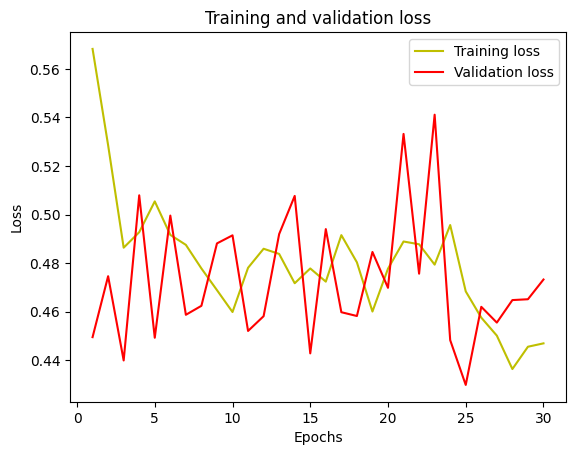

In [174]:
loss =model_history.history['loss'] #훈련 손실 데이터를 가져오기
val_loss =model_history.history['val_loss'] #검증 손실 데이터
epochs = range(1, len(loss) + 1) # 에포크 수, 에포크 수는 손실 값의 길이와 같다.
plt.plot(epochs, loss, 'y', label='Training loss') #훈련 손실을 노란색('y') (얼마나 잘 예측하냐)
plt.plot(epochs, val_loss, 'r', label='Validation loss') #검증 손실을 빨간색('r') ( 낮거나 동등해야됨)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

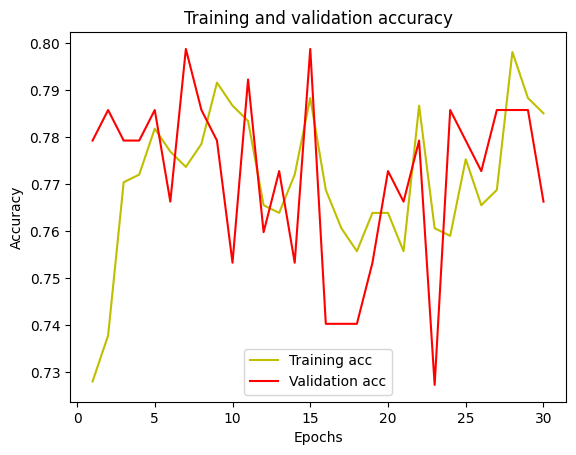

In [175]:
acc =model_history.history['accuracy'] #정확도 값
val_acc =model_history.history['val_accuracy'] 
plt.plot(epochs, acc, 'y', label='Training acc') #훈련 정확도
plt.plot(epochs, val_acc, 'r', label='Validation acc') #검증 정확도
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [176]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))
#precision 정밀도
#recall 재현
#행 실제 클래스
#열 예측 클래스 

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       107
           1       0.62      0.60      0.61        47

    accuracy                           0.77       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.76      0.77      0.76       154

[[90 17]
 [19 28]]
